## Confidence Intervals

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Before proceeding, let's already say a word about how to _interpret_ a confidence interval.

Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that we should be 90% confident that the true population mean beak length is somewhere between 8.6cm and 9.4cm. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

OK: So how do we construct these intervals?

The confidence interval we construct will depend on the statistics of our sample. It will depend in particular on (i) our sample mean and (ii) our sample size.

Naturally, the confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center with a step size equal to the standard error, $\large\frac{\sigma}{\sqrt{n}}$. The number of steps we take is determined by which level of confidence we want attached to our interval: In particular, we take $z$-many steps, where $z$ is the (two-tailed) z-score that corresponds to our chosen level of confidence.

Let's look at an example:

In [3]:
# A normally distributed variable with a
# population size of 1000

pop = set(stats.norm.rvs(size=1000))
len(pop)

1000

In [4]:
# Let's calculate the population mean.

np.mean(list(pop))

-0.006178881723138057

In [5]:
# And the population standard deviation.

np.std(list(pop))

0.992408570787562

Let's say we take a sample of ten from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The z-score that corresponds to an 80%-confidence interval is:

In [7]:
conf = stats.norm.ppf(0.90)
conf

1.2815515655446004

### A Visual Interpretation of Confidence Intervals

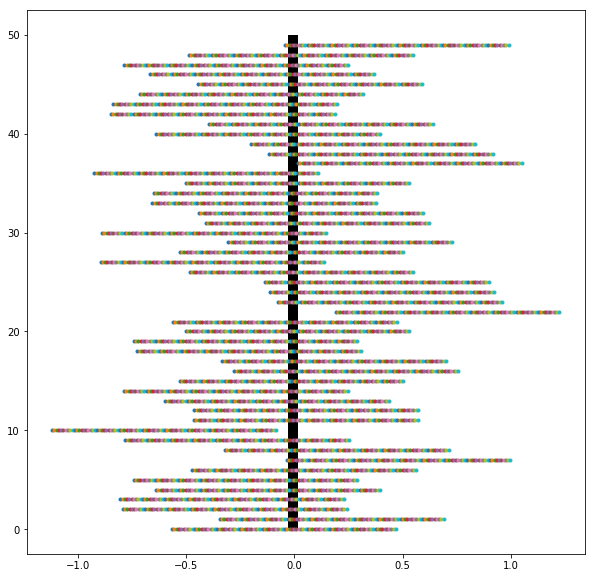

In [9]:
# Plotting CIs

intervals = []
for j in range(50): # number of intervals
    sample = random.sample(pop, 10) # sample size = 10
    step = np.std(list(pop)) / np.sqrt(10) # standard error
    x_min = np.mean(sample) - step * conf # left endpt. of interval
    x_max = np.mean(sample) + step * conf # right endpt. of interval
    intervals.append(np.linspace(x_min, x_max, 100)) # add interval
                                                    # to intervals
plt.figure(figsize = (10, 10))
plt.plot(intervals, range(50), '.') # plot intervals evenly and
                                    # vertically
plt.vlines(np.mean(list(pop)), 0, 50, lw=10);